# Project 1 – Charles

In [258]:
import numpy as np
import pandas as pd
import re
import matplotlib
import seaborn as sns

In [259]:
aug_sep = pd.read_csv("Simmer_AugSep19.csv", low_memory=False)
oct_nov = pd.read_csv("Simmer_OctNov19.csv", low_memory=False)
dec_jan = pd.read_csv("Simmer_DecJan19.csv", low_memory=False)
feb_mar = pd.read_csv("Simmer_FebMar20.csv", low_memory=False)
people = pd.read_csv("People_Sample.csv", low_memory=False)

In [260]:
pd.set_option('display.max_colwidth', -1)

# Data Cleaning

Define a function that filters out columns that contains percentage of Nan values above a certain threshold.

In [293]:
def filter_nan(df, threshold):
    length = len(df)
    result = pd.DataFrame()
    for col in df.columns:
        if (df[col].isnull().sum() < length * threshold):
            result[col] = df[col]
    return result

In [294]:
filtered_aug_sep = filter_nan(aug_sep, 0.5)
filtered_oct_nov = filter_nan(oct_nov, 0.5)
filtered_dec_jan = filter_nan(dec_jan, 0.5)
filtered_feb_mar = filter_nan(feb_mar, 0.5)

In [295]:
useful_features_people = ['distinct_id', 
                   'properties.$ae_total_app_session_length', 
                   'properties.Name',
                   'properties.$region',
                   'properties.$country_code',
                   'properties.$city',
                   'properties.AuthProvider',
                   'properties.$ae_total_app_sessions',
                   'properties.$timezone',
                   'properties.$last_seen',
                   'properties.$ios_app_version',
                   'properties.$ios_version',
                   'properties.$ios_device_model',
                   'properties.$ios_lib_version',
                   'properties.$ae_first_app_open_date'
                  ]

In [296]:
def clean_people(people_data, features):
    people_data = filter_nan(people_data, 0.5)
    people_data = people_data.loc[:, features]
    people_data.rename(columns=lambda x: re.sub('properties.|\$','',x), inplace=True)
    people_data.rename(columns={'Name' : 'name', 'AuthProvider' : 'auth_provider'}, inplace=True)
    people_data['name'].fillna('Unknown', inplace=True)
    people_data['city'].fillna('Unknown', inplace=True)
    people_data['region'].fillna('Unknown', inplace=True)
    people_data['auth_provider'].fillna('Unknown', inplace=True)
    people_data['ae_first_app_open_date'] = pd.to_datetime(people_data['ae_first_app_open_date'])
    people_data['last_seen'] = pd.to_datetime(people_data['last_seen'])
    #add a column for time between first and last session
    people_data['active_timespan'] = people_data['last_seen'] - people_data['ae_first_app_open_date']
    people_data['average_session_time'] = people_data['ae_total_app_session_length']/people_data['ae_total_app_sessions']
    return people_data

In [297]:
people_cleaned = clean_people(people, useful_features_people)
people_cleaned

,distinct_id,ae_total_app_session_length,name,region,country_code,city,auth_provider,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time
0,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,2.5.0,13.2.3,"iPhone9,3",3.4.9,NaT,NaT,196.544059
1,E2D9AB63-1718-4D1E-936F-10BE1D889989,4412,Theodore Wu,California,US,Burbank,Google,59,America/Los_Angeles,2019-09-08 03:15:47+00:00,2.0.5,13.1,"iPhone9,1",3.4.4,2019-04-22 20:34:46+00:00,138 days 06:41:01,74.779661
2,vaibhavverma9@gmail.com_56,71430,Vaibhav Verma,Gujarat,IN,Ahmedabad,Foodie,621,Asia/Kolkata,2019-04-15 15:18:25+00:00,1.3.7,12.2,"iPhone7,1",3.3.3,NaT,NaT,115.024155
3,0C954A3F-0AB6-4D12-B4E9-D916C95B0C6E,12836,Tiffany Qi,California,US,San Francisco,Facebook,77,America/Los_Angeles,2019-11-09 18:33:06+00:00,2.1.6,13.1.3,"iPhone9,3",3.4.4,2019-05-01 06:57:08+00:00,192 days 11:35:58,166.701299
4,addidas23@gmail.com_139,2066,Nathan Nangia,Illinois,US,Chicago,Foodie,39,America/Chicago,2020-03-18 15:09:21+00:00,2.5.4,13.4,"iPhone11,2",3.4.9,NaT,NaT,52.974359
5,582FE9F6-5A27-4FC0-8F7D-CCEA4AE76AF8,11594,Alicia BurnsWright,District of Columbia,US,Washington,Facebook,127,America/New_York,2020-03-11 15:57:07+00:00,2.5.0,13.3.1,"iPhone10,1",3.4.9,2019-10-14 05:49:26+00:00,149 days 10:07:41,91.291339
6,7466E480-A994-4CFC-BAFD-C9B96841A8A3,33866,Simmer Team,Maryland,US,Elkridge,Foodie,372,America/New_York,2020-03-05 00:12:53+00:00,2.5.0,12.4.1,"iPhone10,3",3.4.9,2019-07-11 22:20:45+00:00,237 days 01:52:08,91.037634
7,B3A9B684-A566-4DB7-B57F-0C8642031E23,2104,Vinodh Peddi,California,US,Santa Clara,Unknown,38,America/Los_Angeles,2020-03-11 20:43:22+00:00,2.5.0,13.3.1,"iPhone11,6",3.4.9,2019-04-23 21:00:16+00:00,322 days 23:43:06,55.368421
8,harshil1088@gmail.com_51,18358,Harshil Raval,Gujarat,IN,Ahmedabad,Google,123,Asia/Kolkata,2020-02-18 10:45:32+00:00,2.4.7,13.2.3,"iPhone9,3",3.4.4,NaT,NaT,149.252033
9,6D7E6967-8074-4EF4-B812-E456E91DADB5,3805,Will Bewley,California,US,San Francisco,Google,62,America/Los_Angeles,2020-03-11 19:23:24+00:00,2.5.0,13.3.1,"iPhone12,5",3.4.9,2018-12-18 13:11:46+00:00,449 days 06:11:38,61.370968


In [298]:
useful_features_event = ['name',
 'distinct_id',
 'time',
 'properties.$ae_session_length',
 'properties.$city',
 'properties.$region',
 'properties.mp_country_code',
 'properties.locationSetting',
 'properties.notificationSettings',
 'properties.FirstTimeUploaded',
 'properties.$had_persisted_distinct_id',
 'properties.Signup With',
 'properties.imageAdded',
 'properties.commentAdded',
 'properties.commentLength',
 'properties.ImageUploaded']

In [299]:
def clean_event(event_data, features):
    event_data = event_data.loc[:, features]
    event_data.rename(columns=lambda x: re.sub('properties.|\$','',x), inplace=True)
    return event_data

In [300]:
aug_sep_cleaned = clean_event(aug_sep, useful_features_event)
oct_nov_cleaned = clean_event(oct_nov, useful_features_event)
dec_jan_cleaned = clean_event(dec_jan, useful_features_event)
feb_mar_cleaned = clean_event(feb_mar, useful_features_event)
past_7_months = aug_sep_cleaned.append(oct_nov_cleaned).append(dec_jan_cleaned).append(feb_mar_cleaned).reset_index(drop=True)
past_7_months

,name,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
0,$ae_updated,4A47A27E-992F-40D8-8A7E-08CA601D441A,1565013412000,NaN,Columbus,Ohio,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
1,AppOpen,4A47A27E-992F-40D8-8A7E-08CA601D441A,1565013413000,NaN,Lake Zurich,Illinois,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,AppOpen,866F0631-15CB-40CD-8E0A-04753AFFB01A,1565145944000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
3,Visit Signup/Login Page,866F0631-15CB-40CD-8E0A-04753AFFB01A,1565145948000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4,$ae_first_open,12C9B87A-53B0-4283-9083-40AE9F8AB95A,1565522925000,NaN,Niles,Illinois,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,$ae_first_open,FF975FB1-4C9C-4A98-93A2-F95FF54BFFC1,1565624144000,NaN,Chicago,Illinois,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,$ae_updated,0c43d566ee1c2744,1566465905000,NaN,Burbank,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
7,$ae_first_open,3BB43CA4-540F-4E0F-B6AE-E7FB731C3CC0,1566590595000,NaN,Santa Monica,California,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,$ae_first_open,d7b04a61-5d27-4144-bcfc-bf16c479606f,1567377942000,NaN,Redwood City,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
9,$ae_session,d7b04a61-5d27-4144-bcfc-bf16c479606f,1567377959000,16.5,Redwood City,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


In [301]:
merged = people_cleaned.merge(past_7_months, how='left', on='distinct_id')
merged

,distinct_id,ae_total_app_session_length,name_x,region_x,country_code,city_x,auth_provider,ae_total_app_sessions,timezone,last_seen,...,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
0,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
1,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
3,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
5,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
6,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
7,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
8,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
9,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN


In [302]:
merged.isna().sum()

distinct_id                    0    
ae_total_app_session_length    0    
name_x                         0    
region_x                       0    
country_code                   0    
city_x                         0    
auth_provider                  0    
ae_total_app_sessions          0    
timezone                       0    
last_seen                      0    
ios_app_version                0    
ios_version                    0    
ios_device_model               0    
ios_lib_version                0    
ae_first_app_open_date         45537
active_timespan                45537
average_session_time           0    
name_y                         50   
time                           50   
ae_session_length              77785
city_y                         3951 
region_y                       3482 
mp_country_code                101  
locationSetting                92659
notificationSettings           92294
FirstTimeUploaded              85907
had_persisted_distinct_id      135  
S

In [303]:
len(merged[merged['notificationSettings'].isna() == False].groupby('distinct_id').agg(sum))

35

In [304]:
len(merged.groupby('distinct_id').agg(sum))

181

In [273]:
merged['Signup With'] = merged['Signup With'].fillna(0)
merged

,distinct_id,ae_total_app_session_length,name_x,region_x,country_code,city_x,auth_provider,ae_total_app_sessions,timezone,last_seen,...,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
0,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
1,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
2,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
3,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
4,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
5,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
6,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
7,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
8,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
9,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN


In [274]:
su = merged[merged['Signup With'] != 0]
su

,distinct_id,ae_total_app_session_length,name_x,region_x,country_code,city_x,auth_provider,ae_total_app_sessions,timezone,last_seen,...,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
2681,582FE9F6-5A27-4FC0-8F7D-CCEA4AE76AF8,11594,Alicia BurnsWright,District of Columbia,US,Washington,Facebook,127,America/New_York,2020-03-11 15:57:07+00:00,...,US,NaN,NaN,NaN,True,Facebook,NaN,NaN,NaN,NaN
3551,7466E480-A994-4CFC-BAFD-C9B96841A8A3,33866,Simmer Team,Maryland,US,Elkridge,Foodie,372,America/New_York,2020-03-05 00:12:53+00:00,...,US,NaN,NaN,NaN,True,Foodie,NaN,NaN,NaN,NaN
3806,7466E480-A994-4CFC-BAFD-C9B96841A8A3,33866,Simmer Team,Maryland,US,Elkridge,Foodie,372,America/New_York,2020-03-05 00:12:53+00:00,...,US,NaN,NaN,NaN,True,Foodie,NaN,NaN,NaN,NaN
5994,4749ABC7-01BD-4E5E-A957-D22EDDBCD76A,6541,Alex Knobel,District of Columbia,US,Washington,Unknown,44,America/New_York,2020-03-22 14:32:49+00:00,...,US,NaN,NaN,NaN,True,Google,NaN,NaN,NaN,NaN
6295,78D35D7D-A097-468F-AEF3-F93921366BD3,4672,Mansa Musa,California,US,San Francisco,Foodie,39,America/Los_Angeles,2020-02-26 01:02:08+00:00,...,US,NaN,NaN,NaN,True,Foodie,NaN,NaN,NaN,NaN
6643,27968824-675F-4995-979B-44776827567C,4399,Pavan Bhargava,New York,US,New York,Facebook,58,America/New_York,2020-02-29 23:32:31+00:00,...,US,NaN,NaN,NaN,True,Facebook,NaN,NaN,NaN,NaN
25635,D3264EA1-91F5-4AB1-824C-39BC50BEA979,3903,Zack Zindler,California,US,Burbank,Foodie,45,America/Los_Angeles,2019-08-29 19:45:45+00:00,...,US,NaN,NaN,NaN,True,Foodie,NaN,NaN,NaN,NaN
25636,D3264EA1-91F5-4AB1-824C-39BC50BEA979,3903,Zack Zindler,California,US,Burbank,Foodie,45,America/Los_Angeles,2019-08-29 19:45:45+00:00,...,US,NaN,NaN,NaN,True,Foodie,NaN,NaN,NaN,NaN
26319,3059A451-3178-4602-84FF-AAD5E8607CAF,7934,Shivani Maheshwari,Gujarat,IN,Ahmedabad,Foodie,176,Asia/Kolkata,2019-11-30 11:38:12+00:00,...,IN,NaN,NaN,NaN,True,Foodie,NaN,NaN,NaN,NaN
27080,09353F2A-56B0-4BF8-B532-C8B9B25BCC80,5691,Kate Longo,District of Columbia,US,Washington,Unknown,66,America/New_York,2020-03-07 15:01:33+00:00,...,US,NaN,NaN,NaN,True,Facebook,NaN,NaN,NaN,NaN


In [275]:
su.groupby('distinct_id').agg(sum)

,ae_total_app_session_length,ae_total_app_sessions,average_session_time,time,commentLength
distinct_id,,,,,
09353F2A-56B0-4BF8-B532-C8B9B25BCC80,5691,66,86.227273,1.576474e+12,0.0
0A9EAE40-440D-4292-91CE-1817EC1C5E82,3040,62,49.032258,1.577351e+12,0.0
14AF7B99-6CB0-42BC-8FD7-4D7172595D4F,6362,67,94.955224,1.571337e+12,0.0
14E548F9-6049-43B4-91FC-447A6F3918B7,8956,91,98.417582,1.571748e+12,0.0
27968824-675F-4995-979B-44776827567C,4399,58,75.844828,1.565728e+12,0.0
2BA8DF6C-7C91-4299-A397-64CA7548B26F,2604,44,59.181818,1.567780e+12,0.0
2ED8AA78-8015-4812-AB34-CCA9909AC090,3328,41,81.170732,1.570885e+12,0.0
3059A451-3178-4602-84FF-AAD5E8607CAF,7934,176,45.079545,1.572997e+12,0.0
35E2002C-4527-4BE0-A29F-37C2C66AF4EA,2078,34,61.117647,1.568862e+12,0.0


In [276]:
merged.columns

Index(['distinct_id', 'ae_total_app_session_length', 'name_x', 'region_x',
       'country_code', 'city_x', 'auth_provider', 'ae_total_app_sessions',
       'timezone', 'last_seen', 'ios_app_version', 'ios_version',
       'ios_device_model', 'ios_lib_version', 'ae_first_app_open_date',
       'active_timespan', 'average_session_time', 'name_y', 'time',
       'ae_session_length', 'city_y', 'region_y', 'mp_country_code',
       'locationSetting', 'notificationSettings', 'FirstTimeUploaded',
       'had_persisted_distinct_id', 'Signup With', 'imageAdded',
       'commentAdded', 'commentLength', 'ImageUploaded'],
      dtype='object')

In [277]:
merged.groupby('distinct_id').agg({'name_x' : min})

,name_x
distinct_id,
04092BFB-F874-4B4A-A970-CE8E328B2DF7,Richard wu
04ADA4C3-9212-49DA-B600-67A8403D69C3,Alexandria Ma
054528AB-F5A3-4C47-A572-A32F9D57C9D1,Emily Alvarado
06734B33-C7EE-4CA7-9643-7C27BB6B509F,Angela Zhao
09353F2A-56B0-4BF8-B532-C8B9B25BCC80,Kate Longo
0A9EAE40-440D-4292-91CE-1817EC1C5E82,Wanmin Zhang
0C954A3F-0AB6-4D12-B4E9-D916C95B0C6E,Tiffany Qi
0EA7FB2F-E86D-4DD6-BAA1-1DF7F21C358F,Unknown
0F949AE7-2983-47AC-B81C-946ED693F153,Ken Rozin


# Exploratory Data Analysis

# Visualization

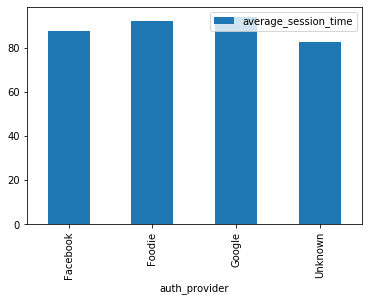

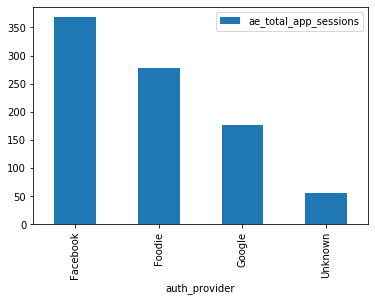

In [278]:
session_length = people_cleaned[['auth_provider', 'average_session_time']].groupby('auth_provider').mean()
num_sessions = people_cleaned[['auth_provider', 'ae_total_app_sessions']].groupby('auth_provider').mean()
session_length.plot.bar()
num_sessions.plot.bar();


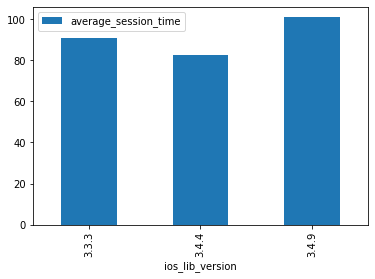

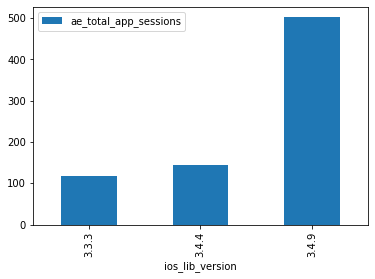

In [279]:
session_length1 = people_cleaned[['ios_lib_version', 'average_session_time']].groupby('ios_lib_version').mean()
num_sessions1 = people_cleaned[['ios_lib_version', 'ae_total_app_sessions']].groupby('ios_lib_version').mean()
session_length1.plot.bar()
num_sessions1.plot.bar();

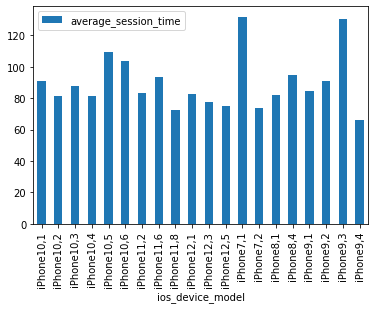

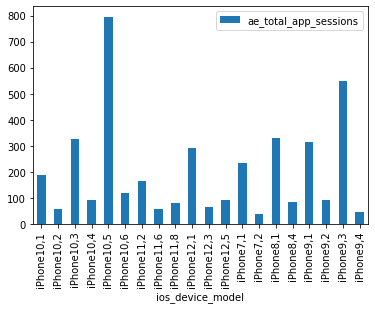

In [280]:
session_length2 = people_cleaned[['ios_device_model', 'average_session_time']].groupby('ios_device_model').mean()
num_sessions2 = people_cleaned[['ios_device_model', 'ae_total_app_sessions']].groupby('ios_device_model').mean()
session_length2.plot.bar()
num_sessions2.plot.bar();

# CODE FOR DATA CLEANING

In [281]:
# this function returns a dictionary of how many times a keyword appears in each column per user
def count_keyword(df, keyword):
    countDict = {}
    for col in df.columns:
        new = df[df[col] == keyword].drop_duplicates('distinct_id')
        count = len(new)
        countDict.update({col : count})
    return countDict

In [282]:
count_keyword(people_cleaned, 'Unknown')

{'distinct_id': 0,
 'ae_total_app_session_length': 0,
 'name': 23,
 'region': 6,
 'country_code': 0,
 'city': 7,
 'auth_provider': 43,
 'ae_total_app_sessions': 0,
 'timezone': 0,
 'last_seen': 0,
 'ios_app_version': 0,
 'ios_version': 0,
 'ios_device_model': 0,
 'ios_lib_version': 0,
 'ae_first_app_open_date': 0,
 'active_timespan': 0,
 'average_session_time': 0}

In [283]:
# this function returns a dictionary of the type of value each column contains
def column_type(df):
    typeDict = {}
    for col in df.columns:
        typeCol = type(df[col][100])
        typeDict.update({col : typeCol})
    return typeDict

In [284]:
column_type(people_cleaned)

{'distinct_id': str,
 'ae_total_app_session_length': numpy.int64,
 'name': str,
 'region': str,
 'country_code': str,
 'city': str,
 'auth_provider': str,
 'ae_total_app_sessions': numpy.int64,
 'timezone': str,
 'last_seen': pandas._libs.tslibs.timestamps.Timestamp,
 'ios_app_version': str,
 'ios_version': str,
 'ios_device_model': str,
 'ios_lib_version': str,
 'ae_first_app_open_date': pandas._libs.tslibs.timestamps.Timestamp,
 'active_timespan': pandas._libs.tslibs.timedeltas.Timedelta,
 'average_session_time': numpy.float64}

In [285]:
column_type(past_7_months)

{'name': str,
 'distinct_id': str,
 'time': numpy.int64,
 'ae_session_length': float,
 'city': str,
 'region': str,
 'mp_country_code': str,
 'locationSetting': float,
 'notificationSettings': float,
 'FirstTimeUploaded': float,
 'had_persisted_distinct_id': bool,
 'Signup With': float,
 'imageAdded': float,
 'commentAdded': float,
 'commentLength': numpy.float64,
 'ImageUploaded': float}

In [286]:
# this function returns a dictionary of each column and all its unqiue values
def unique_values(df):
    uniqueDict = {}
    for col in df.columns:
        vals = df[col].unique()
        uniqueDict.update({col : vals})
    return uniqueDict

In [287]:
unique_values(people_cleaned)

{'distinct_id': array(['hr@gmail.com_87', 'E2D9AB63-1718-4D1E-936F-10BE1D889989',
        'vaibhavverma9@gmail.com_56',
        '0C954A3F-0AB6-4D12-B4E9-D916C95B0C6E', 'addidas23@gmail.com_139',
        '582FE9F6-5A27-4FC0-8F7D-CCEA4AE76AF8',
        '7466E480-A994-4CFC-BAFD-C9B96841A8A3',
        'B3A9B684-A566-4DB7-B57F-0C8642031E23', 'harshil1088@gmail.com_51',
        '6D7E6967-8074-4EF4-B812-E456E91DADB5',
        'F6E15C10-CC6E-4A41-9A55-07E06F172F8A',
        'FE221C6D-8605-42E4-9249-2E8420994F1B',
        '930B3347-A749-4B92-99BC-0E27A489150C',
        'CE1E3FC3-FC94-4FB0-AC67-6FA248D8A135',
        '4749ABC7-01BD-4E5E-A957-D22EDDBCD76A',
        'F8B626E6-C04A-450B-8736-2769C564A03C',
        '78D35D7D-A097-468F-AEF3-F93921366BD3',
        'ca8jessica17@gmail.com_277',
        '7BD658C6-5F37-43B5-BBD9-48B98DB9FFCF_228',
        'a.road100@gmail.com_199', '27968824-675F-4995-979B-44776827567C',
        'meggiesu8@gmail.com_253', '102EC188-BC8B-4808-AE25-2AF1F014CD27',
        '

In [288]:
unique_values(past_7_months)

{'name': array(['$ae_updated', 'AppOpen', 'Visit Signup/Login Page',
        '$ae_first_open', '$ae_session', 'Feed - Scroll Down',
        'Home - Explore Nearby', 'Onboarding - Allow Location',
        'Onboarding - Allow Notifications', 'Permissions for Locations',
        'Signup - Skip', 'Menu Page - Accuracy Popup',
        'Rating Flow - Start', 'Sidebar - Go to Followers',
        'Signup Success', 'Visit Menu Page', 'Search - Change Section',
        'Search - Results Loaded', 'Search - Tap Home Bar',
        'Search - Tap Result', 'Search - Tap Return', 'Feed - Tap Dish',
        'Nearby - Tap Dish Maps', 'Onboarding - Always Allow Location',
        'Permissions for Notifications', 'Search - Tap Nearby Restaurant',
        'Home - Order Delivery', 'Maps Popup - Go to Reviews',
        'Maps Popup - Open', 'Menu Page - Rate via Add Icon',
        'Menu Page - See Restaurant Details', 'Menu Page - Switch Menus',
        'Request Restaurant', 'Search - Tap to Request', 'Login',

# Convert Time to Datetime Object

In [305]:
past_7_months['time'] = [datetime.fromtimestamp(i / 1000.0).strftime('%Y-%m-%d %H:%M:%S.%f') for i in past_7_months['time']]
past_7_months

,name,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
0,$ae_updated,4A47A27E-992F-40D8-8A7E-08CA601D441A,2019-08-05 06:56:52.000000,NaN,Columbus,Ohio,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
1,AppOpen,4A47A27E-992F-40D8-8A7E-08CA601D441A,2019-08-05 06:56:53.000000,NaN,Lake Zurich,Illinois,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,AppOpen,866F0631-15CB-40CD-8E0A-04753AFFB01A,2019-08-06 19:45:44.000000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
3,Visit Signup/Login Page,866F0631-15CB-40CD-8E0A-04753AFFB01A,2019-08-06 19:45:48.000000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4,$ae_first_open,12C9B87A-53B0-4283-9083-40AE9F8AB95A,2019-08-11 04:28:45.000000,NaN,Niles,Illinois,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,$ae_first_open,FF975FB1-4C9C-4A98-93A2-F95FF54BFFC1,2019-08-12 08:35:44.000000,NaN,Chicago,Illinois,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,$ae_updated,0c43d566ee1c2744,2019-08-22 02:25:05.000000,NaN,Burbank,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
7,$ae_first_open,3BB43CA4-540F-4E0F-B6AE-E7FB731C3CC0,2019-08-23 13:03:15.000000,NaN,Santa Monica,California,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,$ae_first_open,d7b04a61-5d27-4144-bcfc-bf16c479606f,2019-09-01 15:45:42.000000,NaN,Redwood City,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
9,$ae_session,d7b04a61-5d27-4144-bcfc-bf16c479606f,2019-09-01 15:45:59.000000,16.5,Redwood City,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


# Sort values by Distinct_ID and then Time to ensure that every user's sessions are together

In [306]:
past_7_months = past_7_months.sort_values('distinct_id').sort_values('time').reset_index(drop=True)
past_7_months

,name,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
0,Collection Flow - Tap New Collection,nb@gmail.com_93,2019-07-31 17:00:01.000000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
1,Collection Flow - Tap Collection,nb@gmail.com_93,2019-07-31 17:00:23.000000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,Menu Page - Accuracy Popup,nb@gmail.com_93,2019-07-31 17:00:30.000000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
3,Profile - Change Section,nb@gmail.com_93,2019-07-31 17:00:39.000000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4,Profile - Change Section,nb@gmail.com_93,2019-07-31 17:00:39.000000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
5,Collection - Visit Collection Detail Page,nb@gmail.com_93,2019-07-31 17:00:42.000000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
6,Profile - Go to Collection,nb@gmail.com_93,2019-07-31 17:00:42.000000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
7,Collection - Tap Restaurant,nb@gmail.com_93,2019-07-31 17:00:52.000000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
8,Visit Menu Page,nb@gmail.com_93,2019-07-31 17:00:57.000000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
9,Feed - Scroll Down,nb@gmail.com_93,2019-07-31 17:00:58.000000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN


In [256]:
past_7_months['city'] = np.where((past_7_months['name'] == '$campaign_delivery'), past_7_months['city'], past_7_months['city'])
past_7_months[past_7_months['name'] == '$campaign_delivery']

,name,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded,country,US
70006,$campaign_delivery,0F006513-7FB0-4F7A-B225-A3CDC3FF25DC,2019-10-31 05:20:18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,2
70007,$campaign_delivery,0F006513-7FB0-4F7A-B225-A3CDC3FF25DC,2019-10-31 08:05:59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,2
70009,$campaign_delivery,0F006513-7FB0-4F7A-B225-A3CDC3FF25DC,2019-11-07 03:24:38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,2
70010,$campaign_delivery,0F006513-7FB0-4F7A-B225-A3CDC3FF25DC,2019-11-08 07:01:20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,2
70061,$campaign_delivery,31CAF72F-81C0-4FE3-83F8-F1CBD29F2E3F,2019-10-31 05:19:39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,2
70062,$campaign_delivery,31CAF72F-81C0-4FE3-83F8-F1CBD29F2E3F,2019-10-31 08:05:59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,2
70069,$campaign_delivery,31CAF72F-81C0-4FE3-83F8-F1CBD29F2E3F,2019-11-07 03:25:22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,2
70071,$campaign_delivery,31CAF72F-81C0-4FE3-83F8-F1CBD29F2E3F,2019-11-08 07:01:20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,2
70111,$campaign_delivery,D06A1836-AB22-4E97-BEB1-22F73822C275,2019-10-30 22:19:43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,2
70112,$campaign_delivery,569E524A-6C38-4FB3-B856-5EB922C09907,2019-10-31 05:09:34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,2


# Create a new column called US that one hot encodes mp_country_code

In [241]:
past_7_months['country'] = past_7_months['mp_country_code'].apply(lambda x: 'NA' if not isinstance(x, str) else 'US' if x == 'US' else 'INTL')
past_7_months['US'] = past_7_months['mp_country_code']
past_7_months['US'] = past_7_months['US'].apply(lambda x: 2 if not isinstance(x, str) else 1 if x == 'US' else 0)
past_7_months


,name,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded,country,US
0,$ae_updated,4A47A27E-992F-40D8-8A7E-08CA601D441A,1565013412000,NaN,Columbus,Ohio,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,US,1
1,AppOpen,4A47A27E-992F-40D8-8A7E-08CA601D441A,1565013413000,NaN,Lake Zurich,Illinois,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,US,1
2,AppOpen,866F0631-15CB-40CD-8E0A-04753AFFB01A,1565145944000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,INTL,0
3,Visit Signup/Login Page,866F0631-15CB-40CD-8E0A-04753AFFB01A,1565145948000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,INTL,0
4,$ae_first_open,12C9B87A-53B0-4283-9083-40AE9F8AB95A,1565522925000,NaN,Niles,Illinois,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1
5,$ae_first_open,FF975FB1-4C9C-4A98-93A2-F95FF54BFFC1,1565624144000,NaN,Chicago,Illinois,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1
6,$ae_updated,0c43d566ee1c2744,1566465905000,NaN,Burbank,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,US,1
7,$ae_first_open,3BB43CA4-540F-4E0F-B6AE-E7FB731C3CC0,1566590595000,NaN,Santa Monica,California,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1
8,$ae_first_open,d7b04a61-5d27-4144-bcfc-bf16c479606f,1567377942000,NaN,Redwood City,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,US,1
9,$ae_session,d7b04a61-5d27-4144-bcfc-bf16c479606f,1567377959000,16.5,Redwood City,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,US,1


# Examine if one user has used the app in multiple regions

In [78]:
regions = past_7_months.groupby(['distinct_id'], as_index=['distinct_id', 'region']).agg({'region': list}) 
regions

,region
distinct_id,
00000000-0000-0000-0000-000000000000,"[Maharashtra, Gujarat]"
000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,"[California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California]"
001210DC-54C8-43AD-B295-148F47818391,"[Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas]"
0019C3B9-FA62-4AB4-A895-1390A1FA818C,[nan]
0025A8A4-2590-4ECA-8CE8-419D710AE46F,"[District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, Virginia, Virginia, Virginia, Virginia, Virginia]"
0038898ed9b23f7e,[Metro Manila]
003BC352-1FE5-462C-883F-932AC209EB93,"[California, California, California, California, California, California, California, California, California]"
00471d582ed13800,[Tennessee]
00492868-3539-4228-AF7E-04AF74447A65,[Massachusetts]


# Working on how to replace NaN for cities and region when it is known for a user

In [331]:
#test = past_7_months[past_7_months['distinct_id'] == 'willwojt@gmail.com_6868']
test

,distinct_id,region
0,00000000-0000-0000-0000-000000000000,"[Maharashtra, Gujarat]"
1,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,"[California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California, California]"
2,001210DC-54C8-43AD-B295-148F47818391,"[Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas, Texas]"
3,0019C3B9-FA62-4AB4-A895-1390A1FA818C,[nan]
4,0025A8A4-2590-4ECA-8CE8-419D710AE46F,"[District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, Pennsylvania, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, Virginia, Virginia, Virginia, Virginia, Virginia]"
5,0038898ed9b23f7e,[Metro Manila]
6,003BC352-1FE5-462C-883F-932AC209EB93,"[California, California, California, California, California, California, California, California, California]"
7,00471d582ed13800,[Tennessee]
8,00492868-3539-4228-AF7E-04AF74447A65,[Massachusetts]
9,004C9C76-A530-422A-BA1B-667CDA12A08D,"[District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, District of Columbia, Maryland, Maryland, Maryland, Maryland, Maryland, Maryland, Maryland, Maryland, Maryland, Maryland]"


In [347]:
past_7_months['city'] = past_7_months['city'].fillna('nan')
past_7_months['region'] = past_7_months['region'].fillna('nan')
test = past_7_months.groupby(['distinct_id'], as_index=False).agg({'region': list})

for region in test['region']:
    for each_region in region:
        if each_region == 'nan':
            each_region = each_region.shift()


AttributeError: 'str' object has no attribute 'shift'

In [ ]:
past_7_months.fillna(method='ffill', inplace = True)